<h1>FIGURE 3<span class="tocSkip"></span></h1>

###### Firing rate-dependent synaptic plasticity dynamics for the three different neuronal setups P1, P2, P3.

<h1>Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc"><ul class="toc-item"><li><span><a href="#Population-1" data-toc-modified-id="Population-1-1">Population 1</a></span><ul class="toc-item"><li><span><a href="#Groundtruth-rate-dependent-synaptic-plasticity-simulation" data-toc-modified-id="Groundtruth-rate-dependent-synaptic-plasticity-simulation-1.1">Groundtruth rate-dependent synaptic plasticity simulation</a></span></li><li><span><a href="#Simple-mathematical-model-prediction" data-toc-modified-id="Simple-mathematical-model-prediction-1.2">Simple mathematical model prediction</a></span><ul class="toc-item"><li><span><a href="#27-feature-basline-model" data-toc-modified-id="27-feature-basline-model-1.2.1">27 feature basline model</a></span></li><li><span><a href="#Best-3-feature-model" data-toc-modified-id="Best-3-feature-model-1.2.2">Best 3 feature model</a></span></li></ul></li><li><span><a href="#Goodness-of-predictions-over-number-of-features" data-toc-modified-id="Goodness-of-predictions-over-number-of-features-1.3">Goodness of predictions over number of features</a></span></li></ul></li><li><span><a href="#Population-2" data-toc-modified-id="Population-2-2">Population 2</a></span><ul class="toc-item"><li><span><a href="#Groundtruth-rate-dependent-synaptic-plasticity-simulation" data-toc-modified-id="Groundtruth-rate-dependent-synaptic-plasticity-simulation-2.1">Groundtruth rate-dependent synaptic plasticity simulation</a></span></li><li><span><a href="#Simple-mathematical-model-prediction" data-toc-modified-id="Simple-mathematical-model-prediction-2.2">Simple mathematical model prediction</a></span><ul class="toc-item"><li><span><a href="#27-feature-basline-model" data-toc-modified-id="27-feature-basline-model-2.2.1">27 feature basline model</a></span></li><li><span><a href="#Best-3-feature-model" data-toc-modified-id="Best-3-feature-model-2.2.2">Best 3 feature model</a></span></li></ul></li><li><span><a href="#Goodness-of-predictions-over-number-of-features" data-toc-modified-id="Goodness-of-predictions-over-number-of-features-2.3">Goodness of predictions over number of features</a></span></li></ul></li><li><span><a href="#Population-3" data-toc-modified-id="Population-3-3">Population 3</a></span><ul class="toc-item"><li><span><a href="#Groundtruth-rate-dependent-synaptic-plasticity-simulation" data-toc-modified-id="Groundtruth-rate-dependent-synaptic-plasticity-simulation-3.1">Groundtruth rate-dependent synaptic plasticity simulation</a></span></li><li><span><a href="#Simple-mathematical-model-prediction" data-toc-modified-id="Simple-mathematical-model-prediction-3.2">Simple mathematical model prediction</a></span><ul class="toc-item"><li><span><a href="#27-feature-basline-model" data-toc-modified-id="27-feature-basline-model-3.2.1">27 feature basline model</a></span></li><li><span><a href="#Best-3-feature-model" data-toc-modified-id="Best-3-feature-model-3.2.2">Best 3 feature model</a></span></li></ul></li><li><span><a href="#Goodness-of-predictions-over-number-of-features" data-toc-modified-id="Goodness-of-predictions-over-number-of-features-3.3">Goodness of predictions over number of features</a></span></li></ul></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import numba as nb
import matplotlib.pyplot as plt

import cbsp

cbsp.set_simulation_time(2.0)  # global simulation time

## Population 1

### Groundtruth rate-dependent synaptic plasticity simulation
###### Simulates the detailed calcium-based STDP and transforms the data to rate-dependent data of synaptic plasticity

In [2]:
print(cbsp.population_1.main_linear_calcium.__doc__)

RBP from STDP for the whole parameter space using the linear calcium model.
    
    Args:
        u (array, optional): presynaptic firing rates. Defaults to np.arange(0, 101).
        v (array, optional): postsynaptic firing rates. Defaults to np.arange(0, 101).
        w (array, optional): initial synaptic strengths. Defaults to np.arange(0, 1.05, 0.05).
        seed (array, optional): random states. Defaults to np.arange(0, 100).
        nproc (int, optional): number of processes to use. Defaults to 8.
    
    Returns:
        array: rate-based plasticity for all possible combinations of u, v, and w.
                Has shape (#random_states, u.size * v.size * w.size).
    


In [3]:
u = np.linspace(0, 100, 5)
v = np.linspace(0, 100, 5)
w = np.linspace(0, 1, 5)
seed = np.linspace(0, 100, 5)
rbp = cbsp.population_1.main_linear_calcium(u = u, 
                                            v = v, 
                                            w = w,
                                            seed = seed,
                                            nproc = 2)

<IPython.core.display.Javascript object>


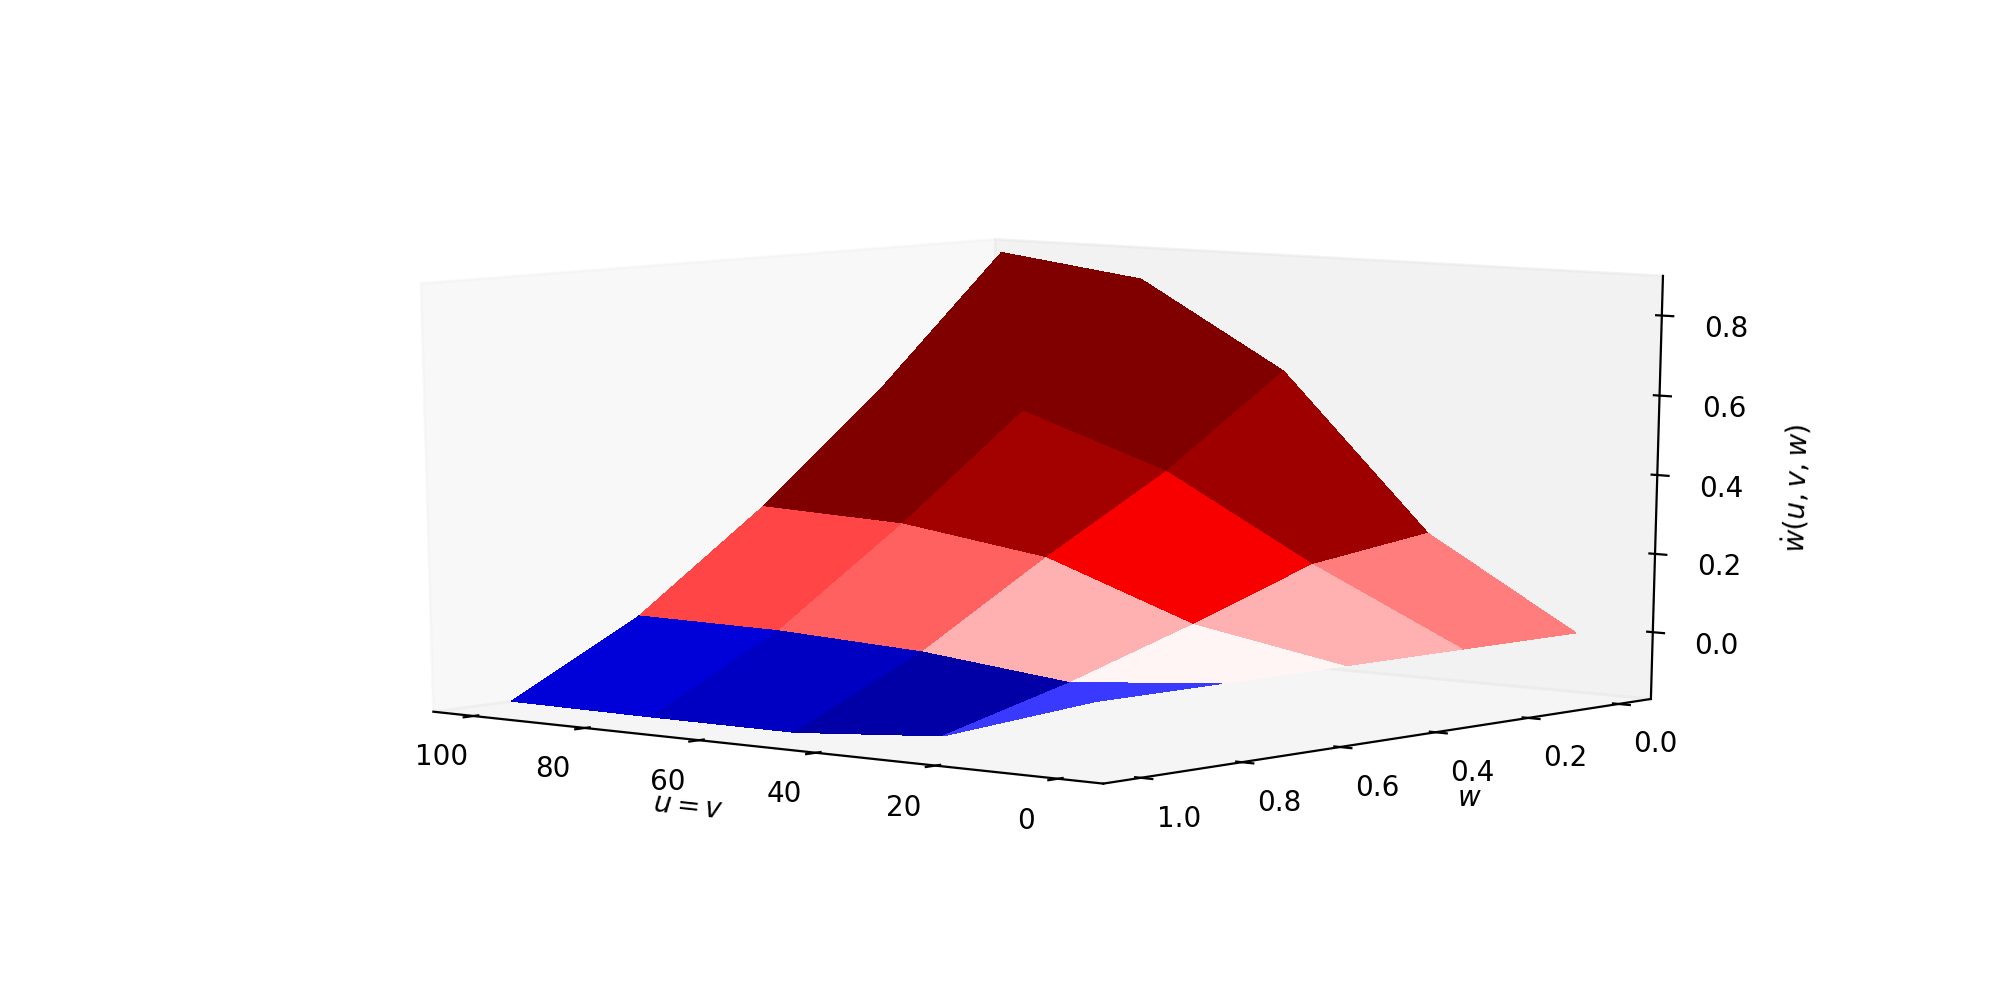

(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x10b0f3ef0>)

In [4]:
cbsp.population_1.plot_3d(u, v, w, rbp.mean(axis=0))

### Simple mathematical model prediction
###### Uses weighted linear least squares regression to describe rate-dependent synaptic plasticity in terms of 3 feature models and the 27 feature baseline model

In [5]:
print(cbsp.validation.__doc__)

Exhaustive search using crossvalidated weighted least squares regression.

The module searches for the best <num_features> describing the data
among the features in a feature matrix.
It can do so iteratively for models of different numbers of features and
then creates a feature count from the best models. The features are defined
through columns in a feature matrix DataFrame.

    Example usage:
        es = ExhaustiveSearch(num_features=3)
        es.fit_iter(X, y, weights, max_features=10)



In [6]:
print(cbsp.validation.ExhaustiveSearch.__doc__)

Exhaustive search using crossvalidated weighted least squares regression.
    
    Args:
        num_features (int): Features included in the learning rule, between 1 and 27. Defaults to 3.
        n_splits (int, optional): Splits for cross validation. Defaults to 5.
        alpha (int, optional): Regularization parameter. Defaults to 0.
        use_weights_for_r2 (bool, optional): Evaluate R in the weighted feature space. Defaults to True.
        use_adj_r2 (bool, optional): Adjust R with respect to number of features. Defaults to True.

    Attributes:
        estimators (Dict[int, List[str]]): indexed 'table' with all possible feature combinations - binom(27, num_features).
        rs (Dict[int, float]): goodness of fit for all feature combinations in estimators.
        coefs (Dict[int, List[float]]): coefficients for all features combinations in estimators.
        coefs_std (Dict[int, List[float]]): standard deviation per coefficient in coefs.
        feat_count (Dict[str, int])

#### 27 feature baseline model

In [7]:
es = cbsp.validation.ExhaustiveSearch(num_features=27)

In [8]:
weights = cbsp.utils.get_weights(rbp)
X = cbsp.population_1.feature_matrix(u, v, w)
es.fit(X, rbp.mean(axis=0), weights)

/Users/lappalainenj/cbsp/cbsp/utils.py:294: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 1d, C))
  b = wls(X_train, y_train, w_train, alpha=alpha)



27 best features:
	1.: ('1', 'u', 'v', 'w', 'u**2', 'u*v', 'u*w', 'v**2', 'v*w', 'w**2', 'u**2*v', 'u**2*w', 'u*v**2', 'u*v*w', 'u*w**2', 'v**2*w', 'v*w**2', 'u**2*v**2', 'u**2*v*w', 'u**2*w**2', 'u*v**2*w', 'u*v*w**2', 'v**2*w**2', 'u**2*v**2*w', 'u**2*v*w**2', 'u*v**2*w**2', 'u**2*v**2*w**2'), 1.207



In [9]:
y_pred = es.predict(X).reshape(len(u), len(v), len(w))

<IPython.core.display.Javascript object>


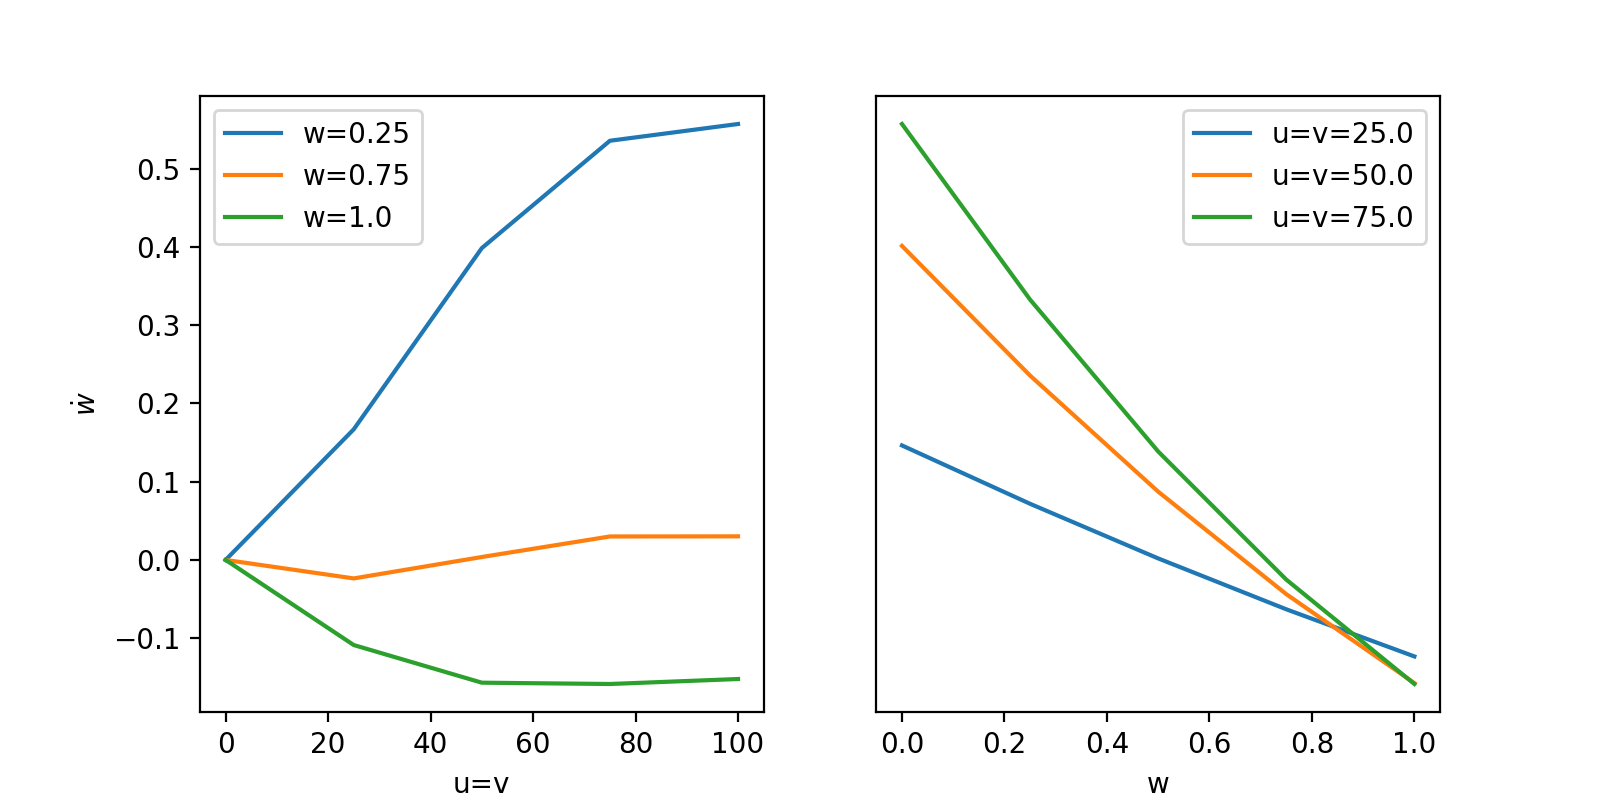

In [10]:
fig = plt.figure(figsize=[8, 4])

ax1 = plt.subplot(121)
ax1.plot(u, y_pred[np.arange(len(u)), np.arange(len(v)), 1], label=f"w={w[1]}")
ax1.plot(u, y_pred[np.arange(len(u)), np.arange(len(v)), 3], label=f"w={w[3]}")
ax1.plot(u, y_pred[np.arange(len(u)), np.arange(len(v)), 4], label=f"w={w[4]}")
ax1.set_ylabel("$\dot{w}$")
ax1.set_xlabel("u=v")
ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(w, y_pred[1, 1, :], label=f"u=v={u[1]}")
ax2.plot(w, y_pred[2, 2, :], label=f"u=v={u[2]}")
ax2.plot(w, y_pred[3, 3, :], label=f"u=v={u[3]}")
ax2.set_yticks([])
ax2.set_xlabel("w")
ax2.legend()

#### Best 3 feature model

In [11]:
es = cbsp.validation.ExhaustiveSearch(num_features=3)

In [12]:
weights = cbsp.utils.get_weights(rbp)
X = cbsp.population_1.feature_matrix(u, v, w)
es.fit(X, rbp.mean(axis=0), weights)


3 best features:
	1.: ('v', 'v*w', 'u*w**2'), 0.720
	2.: ('v**2', 'u*w**2', 'v**2*w'), 0.704
	3.: ('v', 'u*w', 'v*w'), 0.675



In [13]:
y_pred = es.predict(X).reshape(len(u), len(v), len(w))

<IPython.core.display.Javascript object>


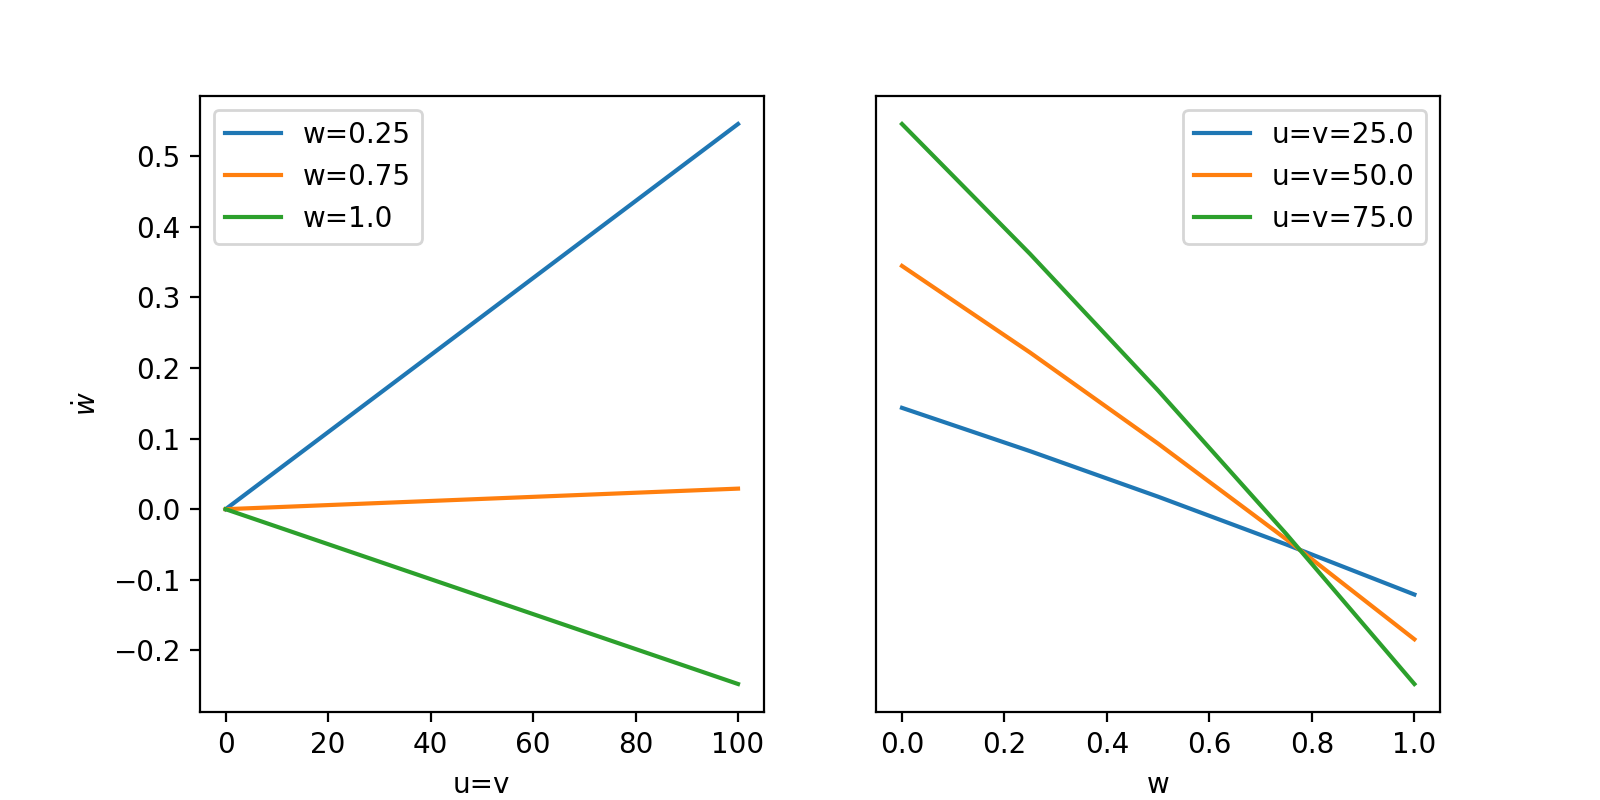

In [14]:
fig = plt.figure(figsize=[8, 4])

ax1 = plt.subplot(121)
ax1.plot(u, y_pred[np.arange(len(u)), np.arange(len(v)), 1], label=f"w={w[1]}")
ax1.plot(u, y_pred[np.arange(len(u)), np.arange(len(v)), 3], label=f"w={w[3]}")
ax1.plot(u, y_pred[np.arange(len(u)), np.arange(len(v)), 4], label=f"w={w[4]}")
ax1.set_ylabel("$\dot{w}$")
ax1.set_xlabel("u=v")
ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(w, y_pred[1, 1, :], label=f"u=v={u[1]}")
ax2.plot(w, y_pred[2, 2, :], label=f"u=v={u[2]}")
ax2.plot(w, y_pred[3, 3, :], label=f"u=v={u[3]}")
ax2.set_yticks([])
ax2.set_xlabel("w")
ax2.legend()

### Goodness of predictions over number of features
###### Performs exhaustive search over a range of n-feature models and compares the performance with ablation of u or u^2 features

In [15]:
es = cbsp.validation.ExhaustiveSearch()
weights = cbsp.utils.get_weights(rbp)
X = cbsp.population_1.feature_matrix(u, v, w)

In [16]:
num_features, best_rs = es.fit_iter(X, rbp.mean(axis=0), weights, max_features=5)


3 best features:
	1.: ('v', 'v*w', 'u*w**2'), 0.720




4 best features:
	1.: ('v', 'u**2', 'u*w', 'v*w'), 0.887




5 best features:
	1.: ('v', 'u**2', 'u*w', 'v*w', 'u**2*w'), 0.942



In [17]:
X_wo_u = X[[c for c in X.columns if "u" not in c or "u**2" in c]]

In [18]:
_, best_rs_wo_u = es.fit_iter(X_wo_u, rbp.mean(axis=0), weights, max_features=5)


3 best features:
	1.: ('v', 'v*w', 'u**2*w**2'), 0.654




4 best features:
	1.: ('v', 'u**2', 'v*w', 'u**2*w'), 0.812




5 best features:
	1.: ('1', 'v', 'u**2', 'v*w', 'u**2*w'), 0.802



In [19]:
X_wo_u2 = X[[c for c in X.columns if "u**2" not in c]]

In [20]:
_, best_rs_wo_u2 = es.fit_iter(X_wo_u2, rbp.mean(axis=0), weights, max_features=5)


3 best features:
	1.: ('v', 'v*w', 'u*w**2'), 0.720




4 best features:
	1.: ('u', 'v', 'u*w', 'v*w'), 0.843




5 best features:
	1.: ('u', 'v', 'u*w', 'v*w', 'u*v**2*w**2'), 0.843



<IPython.core.display.Javascript object>


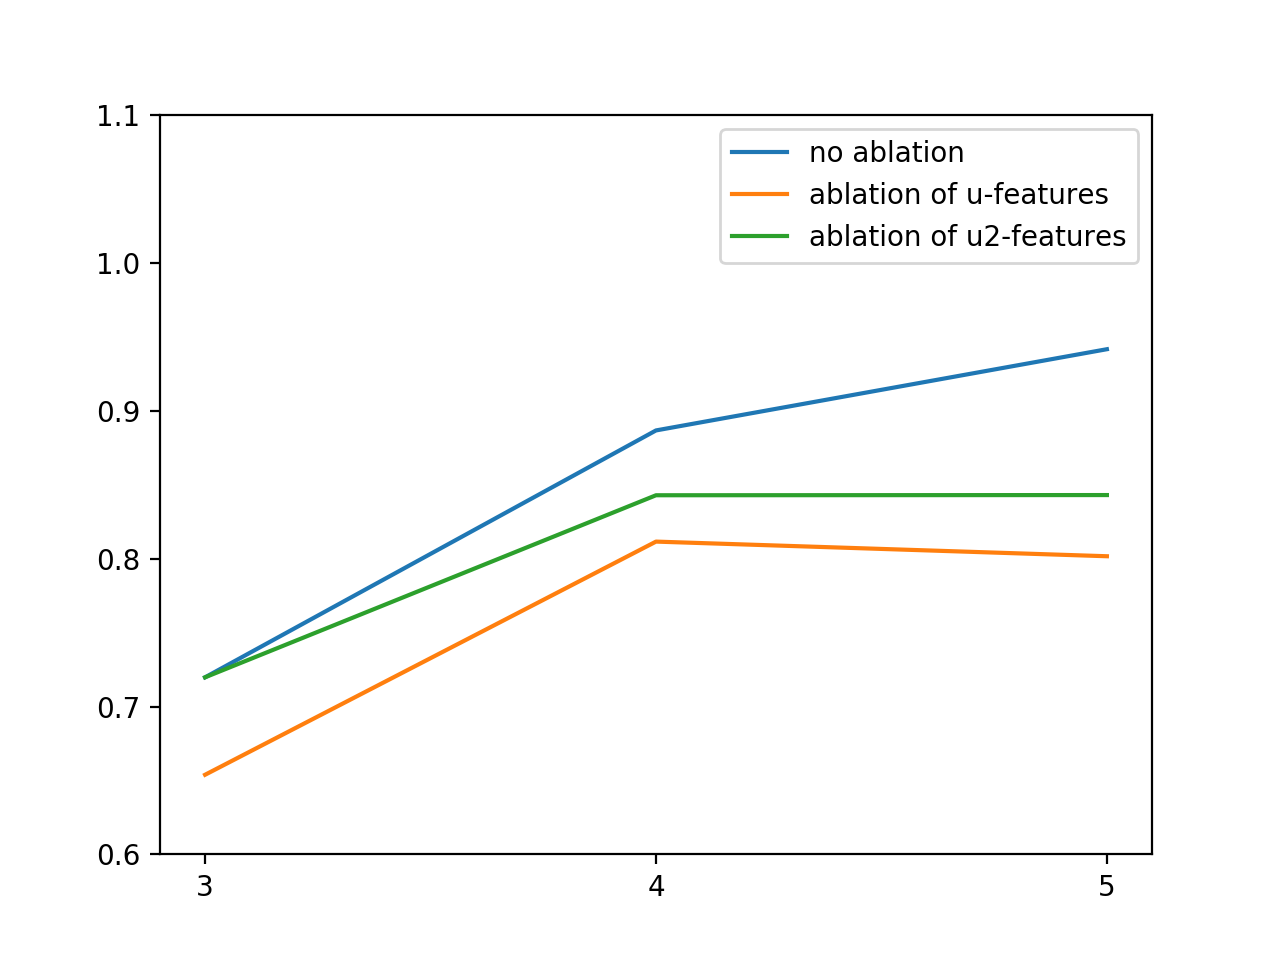

In [21]:
fig = plt.figure()
plt.plot(num_features, best_rs, label="no ablation")
plt.plot(num_features, best_rs_wo_u, label="ablation of u-features")
plt.plot(num_features, best_rs_wo_u2, label="ablation of u2-features")
plt.xticks(num_features)
plt.ylim(0.6, 1.1)
plt.legend()

## Population 2

### Groundtruth rate-dependent synaptic plasticity simulation
###### Simulates the detailed calcium-based STDP and transforms the data to rate-dependent data of synaptic plasticity

In [22]:
u = np.linspace(0, 100, 10)
w = np.linspace(0, 1, 10)
seed = np.linspace(0, 100, 5)
rbp_and_v = cbsp.population_2.main_linear_calcium_mat(u = u, 
                                                        w = w,
                                                        seed = seed,
                                                        nproc = 2)

rbp = rbp_and_v[:, :, 0]
v = rbp_and_v[:, :, 1]

<IPython.core.display.Javascript object>


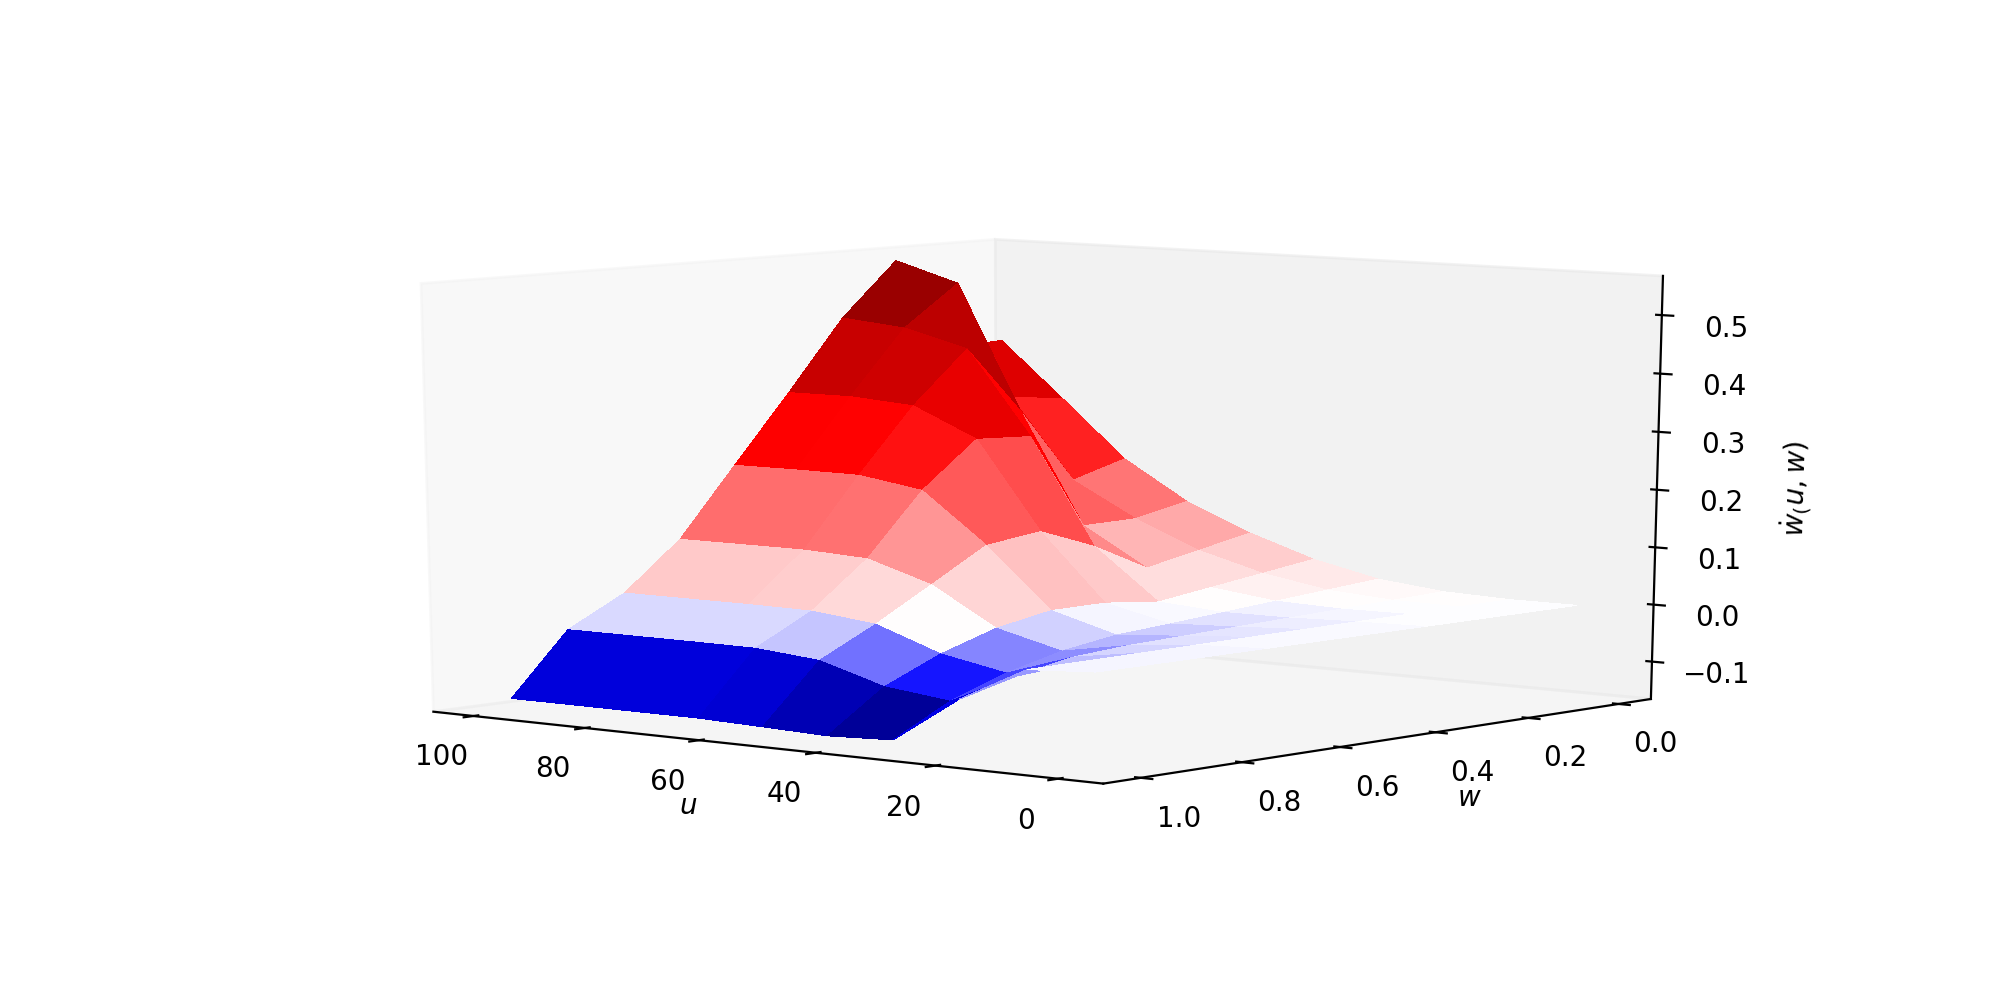

(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x1a23a73470>)

In [23]:
cbsp.population_2.plot_3d(u, w, rbp.mean(axis=0))

<IPython.core.display.Javascript object>


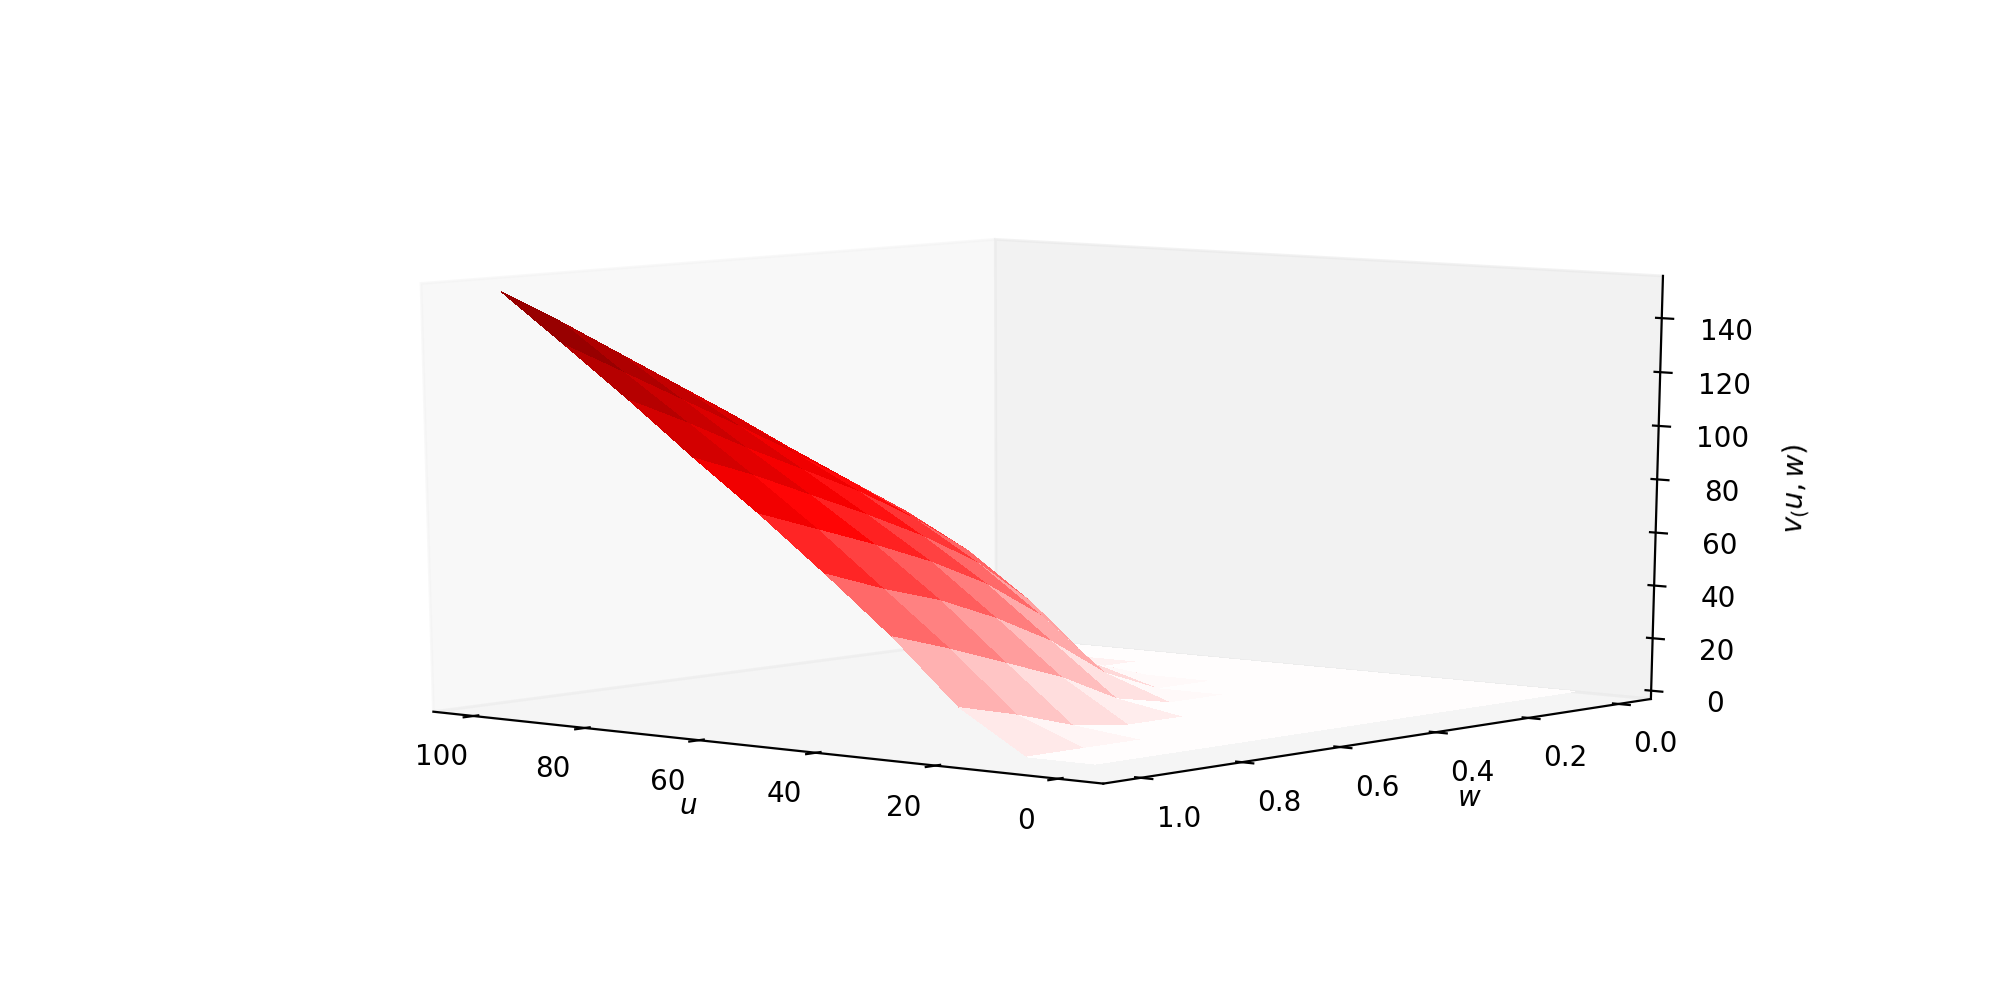

(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x1a22c59438>)

In [24]:
cbsp.population_2.plot_3d(u, w, v.mean(axis=0), zlabel='v')

### Simple mathematical model prediction
###### Uses weighted linear least squares regression to describe rate-dependent synaptic plasticity in terms of 3 feature models and the 27 feature baseline model

#### 27 feature baseline model

In [25]:
es = cbsp.validation.ExhaustiveSearch(num_features=27)


In [26]:
es = cbsp.validation.ExhaustiveSearch(num_features=27)
weights = cbsp.utils.get_weights(rbp)
X = cbsp.population_2.feature_matrix(u, v.mean(axis=0), w)
es.fit(X, rbp.mean(axis=0), weights)


27 best features:
	1.: ('1', 'u', 'v', 'w', 'u**2', 'u*v', 'u*w', 'v**2', 'v*w', 'w**2', 'u**2*v', 'u**2*w', 'u*v**2', 'u*v*w', 'u*w**2', 'v**2*w', 'v*w**2', 'u**2*v**2', 'u**2*v*w', 'u**2*w**2', 'u*v**2*w', 'u*v*w**2', 'v**2*w**2', 'u**2*v**2*w', 'u**2*v*w**2', 'u*v**2*w**2', 'u**2*v**2*w**2'), 1.040



In [27]:
y_pred = es.predict(X).reshape(len(u), len(w))

<IPython.core.display.Javascript object>


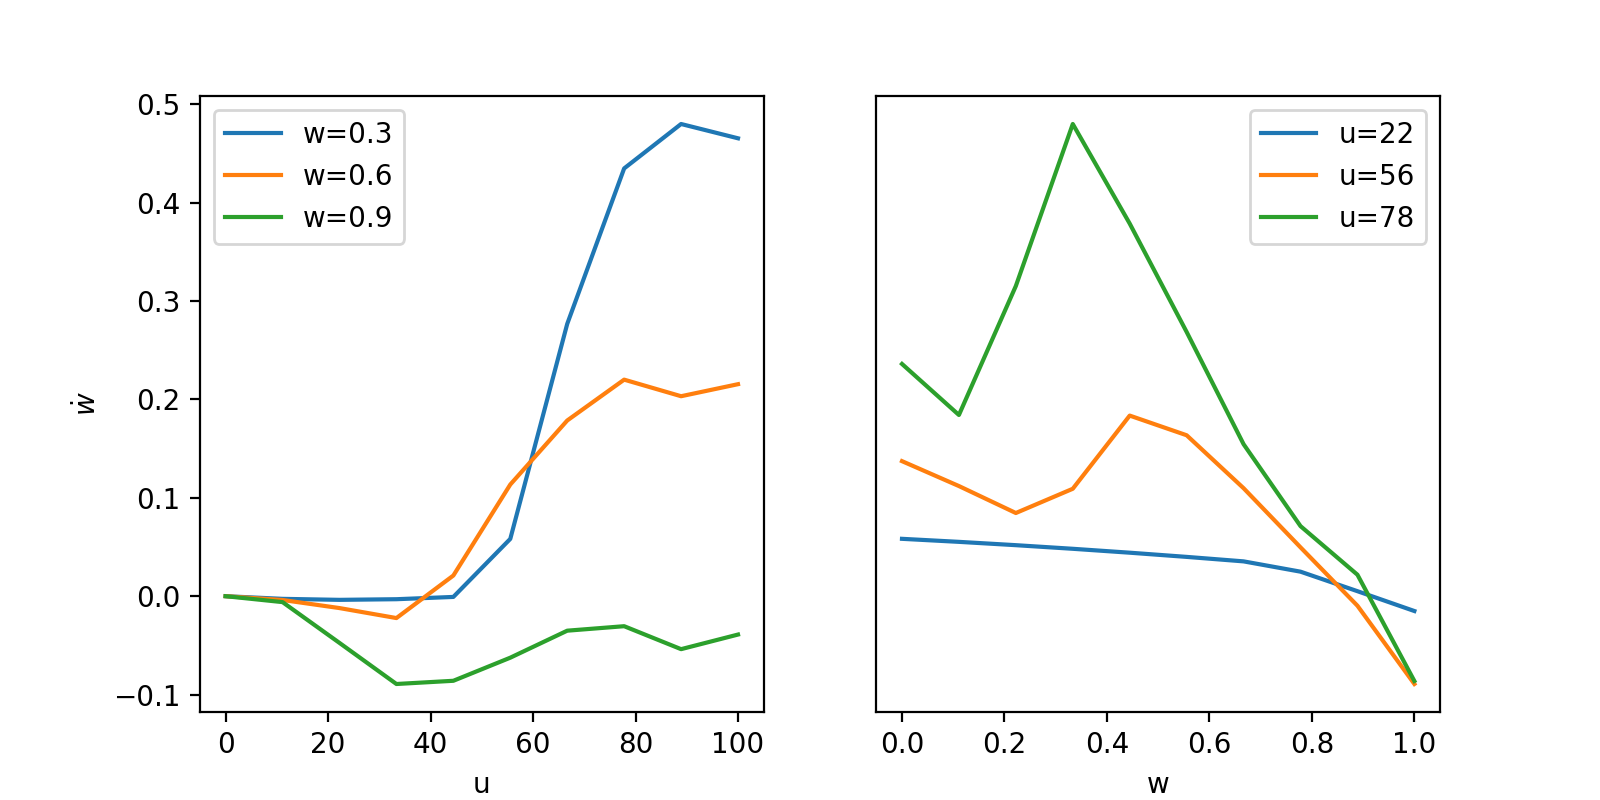

In [28]:
fig = plt.figure(figsize=[8, 4])

ax1 = plt.subplot(121)
ax1.plot(u, y_pred[np.arange(len(u)), 3], label=f"w={w[3]:.1F}")
ax1.plot(u, y_pred[np.arange(len(u)), 5], label=f"w={w[5]:.1F}")
ax1.plot(u, y_pred[np.arange(len(u)), 8], label=f"w={w[8]:.1F}")
ax1.set_ylabel("$\dot{w}$")
ax1.set_xlabel("u")
ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(w, y_pred[2, :], label=f"u={u[2]:.0F}")
ax2.plot(w, y_pred[5, :], label=f"u={u[5]:.0F}")
ax2.plot(w, y_pred[7, :], label=f"u={u[7]:.0F}")
ax2.set_yticks([])
ax2.set_xlabel("w")
ax2.legend()

#### Best 3 feature model

In [29]:
es = cbsp.validation.ExhaustiveSearch(num_features=3)
weights = cbsp.utils.get_weights(rbp)
X = cbsp.population_2.feature_matrix(u, v.mean(axis=0), w)
es.fit(X, rbp.mean(axis=0), weights)


3 best features:
	1.: ('u**2', 'u*v', 'u**2*w**2'), 0.776
	2.: ('u**2', 'u**2*v', 'u**2*w**2'), 0.712
	3.: ('u**2', 'v**2', 'u**2*w**2'), 0.709



In [30]:
y_pred = es.predict(X).reshape(len(u), len(w))

<IPython.core.display.Javascript object>


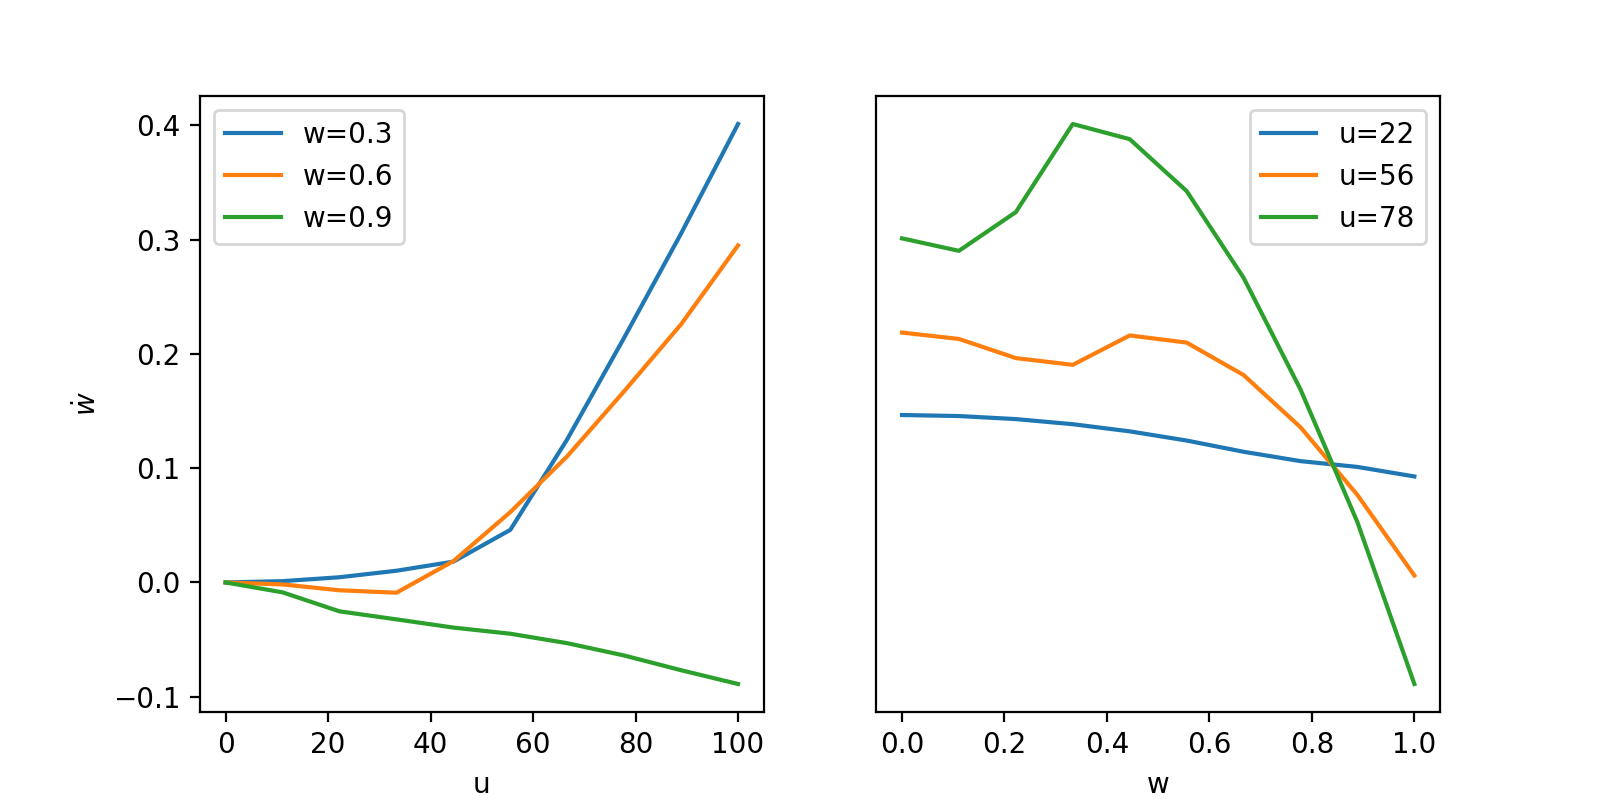

In [31]:
fig = plt.figure(figsize=[8, 4])

ax1 = plt.subplot(121)
ax1.plot(u, y_pred[np.arange(len(u)), 3], label=f"w={w[3]:.1F}")
ax1.plot(u, y_pred[np.arange(len(u)), 5], label=f"w={w[5]:.1F}")
ax1.plot(u, y_pred[np.arange(len(u)), 8], label=f"w={w[8]:.1F}")
ax1.set_ylabel("$\dot{w}$")
ax1.set_xlabel("u")
ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(w, y_pred[2, :], label=f"u={u[2]:.0F}")
ax2.plot(w, y_pred[5, :], label=f"u={u[5]:.0F}")
ax2.plot(w, y_pred[7, :], label=f"u={u[7]:.0F}")
ax2.set_yticks([])
ax2.set_xlabel("w")
ax2.legend()

### Goodness of predictions over number of features
###### Performs exhaustive search over a range of n-feature models and compares the performance with ablation of u or u^2 features

In [32]:
es = cbsp.validation.ExhaustiveSearch()
weights = cbsp.utils.get_weights(rbp)
X = cbsp.population_2.feature_matrix(u, v.mean(axis=0), w)
num_features, best_rs = es.fit_iter(X, rbp.mean(axis=0), weights, min_features=3, max_features=5)


3 best features:
	1.: ('u**2', 'u*v', 'u**2*w**2'), 0.776




4 best features:
	1.: ('u**2', 'u*v', 'u**2*w', 'v*w**2'), 0.818




5 best features:
	1.: ('v', 'u**2', 'v*w', 'u**2*w', 'v**2*w**2'), 0.877



In [33]:
X_wo_u = X[[c for c in X.columns if "u" not in c or "u**2" in c]]

In [34]:
_, best_rs_wo_u = es.fit_iter(X_wo_u, rbp.mean(axis=0), weights, max_features=5)


3 best features:
	1.: ('u**2', 'u**2*v', 'u**2*w**2'), 0.712




4 best features:
	1.: ('u**2', 'u**2*v', 'u**2*w', 'u**2*v**2'), 0.756




5 best features:
	1.: ('v', 'u**2', 'v*w', 'u**2*w', 'v**2*w**2'), 0.877



In [35]:
X_wo_u2 = X[[c for c in X.columns if "u**2" not in c]]

In [36]:
_, best_rs_wo_u2 = es.fit_iter(X_wo_u2, rbp.mean(axis=0), weights, max_features=5)


3 best features:
	1.: ('v', 'v*w', 'u*w**2'), 0.567




4 best features:
	1.: ('u*v', 'v*w', 'u*v**2', 'u*w**2'), 0.579




5 best features:
	1.: ('u*v', 'v*w', 'u*v**2', 'u*w**2', 'u*v**2*w**2'), 0.602



<IPython.core.display.Javascript object>


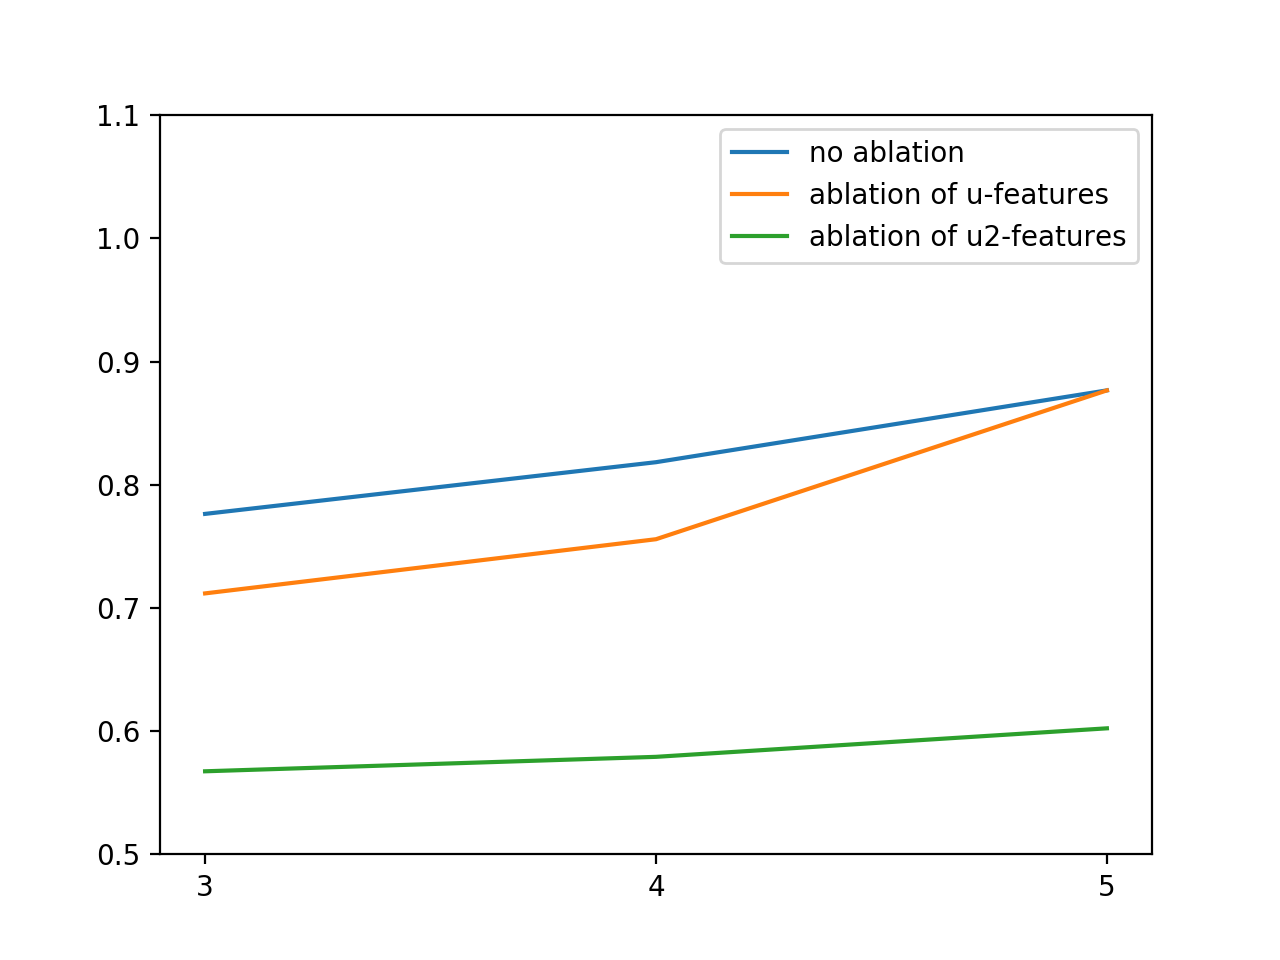

In [37]:
fig = plt.figure()
plt.plot(num_features, best_rs, label="no ablation")
plt.plot(num_features, best_rs_wo_u, label="ablation of u-features")
plt.plot(num_features, best_rs_wo_u2, label="ablation of u2-features")
plt.xticks(num_features)
plt.ylim(0.5, 1.1)
plt.legend()

## Population 3

### Groundtruth rate-dependent synaptic plasticity simulation
###### Simulates the detailed calcium-based STDP and transforms the data to rate-dependent data of synaptic plasticity

In [38]:
u1 = np.linspace(0, 100, 5)
w1 = np.linspace(0, 1, 5)
u2 = np.linspace(0, 100, 5)
w2 = np.linspace(0, 1, 5)
seed = np.linspace(0, 100, 5)
rbp_and_v = cbsp.population_3.main_linear_calcium_mat(u1 = u1, 
                                                        w1 = w1,
                                                        u2 = u2,
                                                        w2 = w2,
                                                        seed = seed,
                                                        nproc = 2)

rbp = rbp_and_v[:, :, 0]
v = rbp_and_v[:, :, 1]

<IPython.core.display.Javascript object>


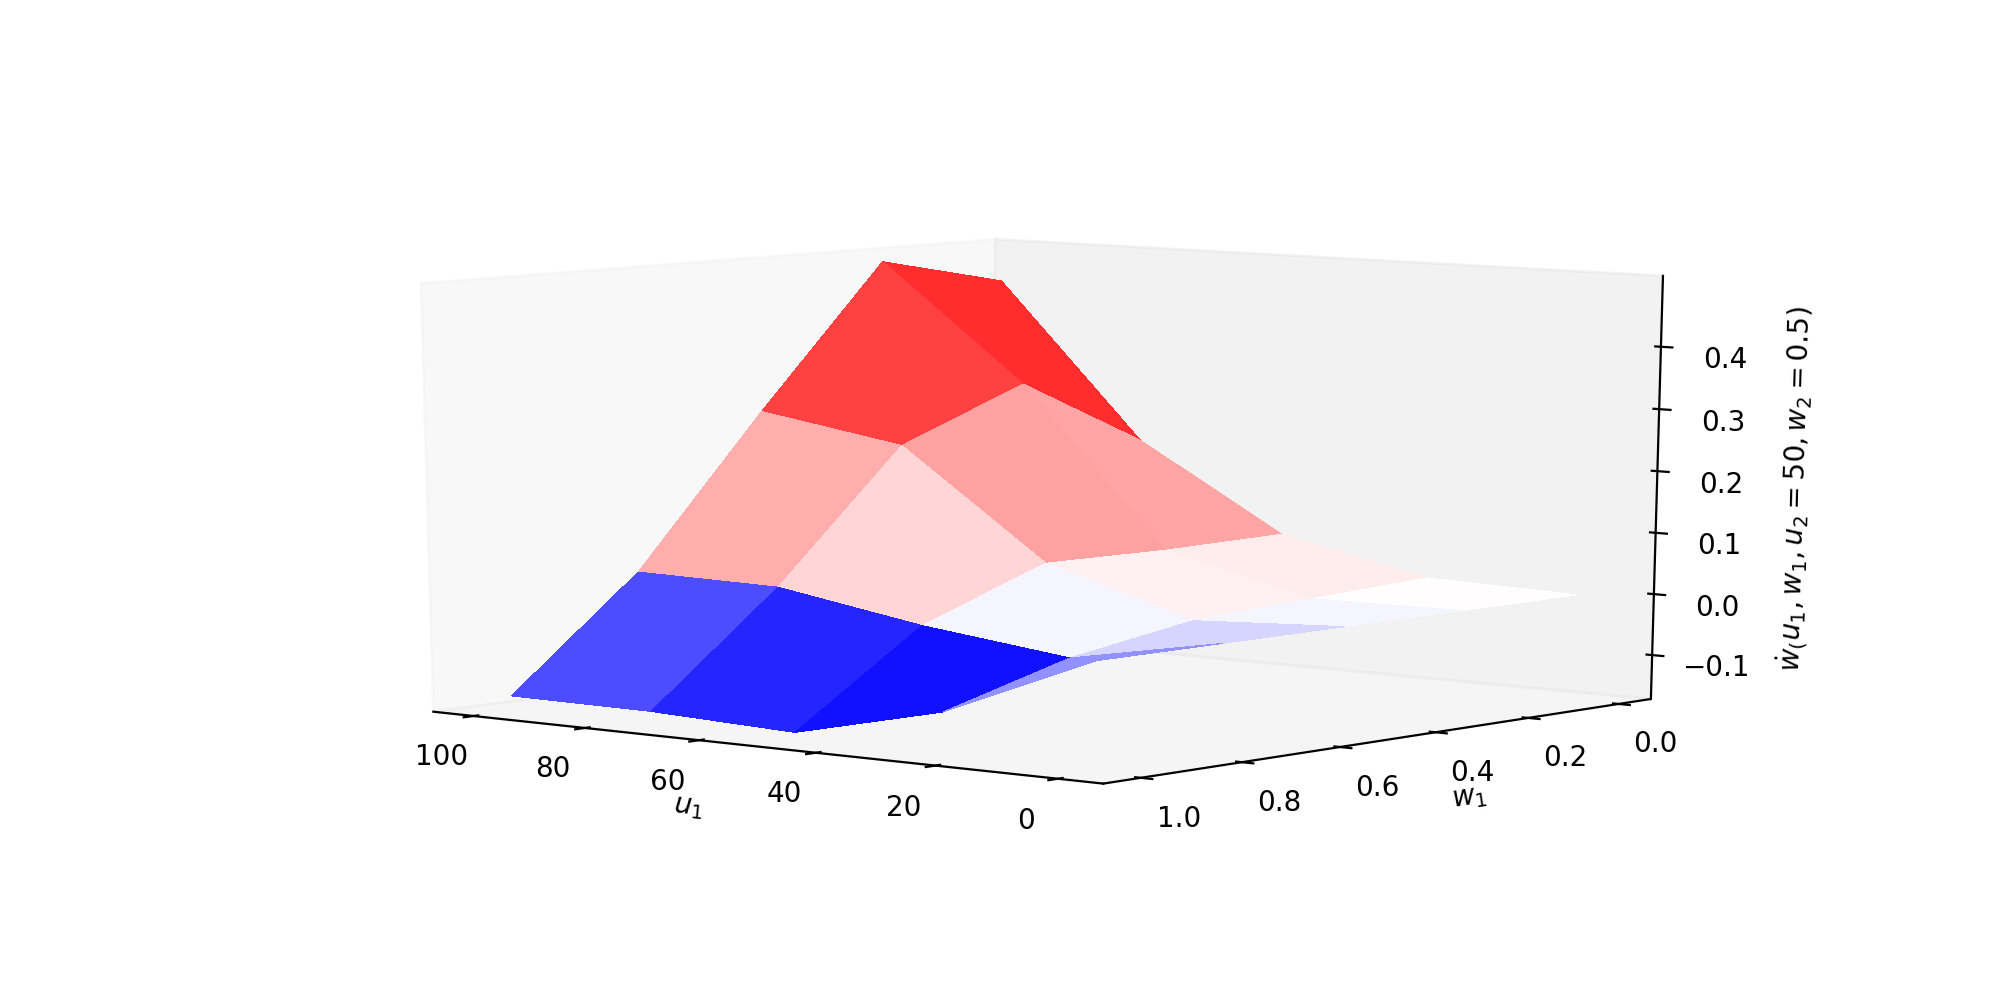

(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x1a22c2f438>)

In [39]:
cbsp.population_3.plot_3d(u1, w1, u2, w2, at_u2=50, at_w2=0.5, rbp_or_v=rbp.mean(axis=0))

<IPython.core.display.Javascript object>


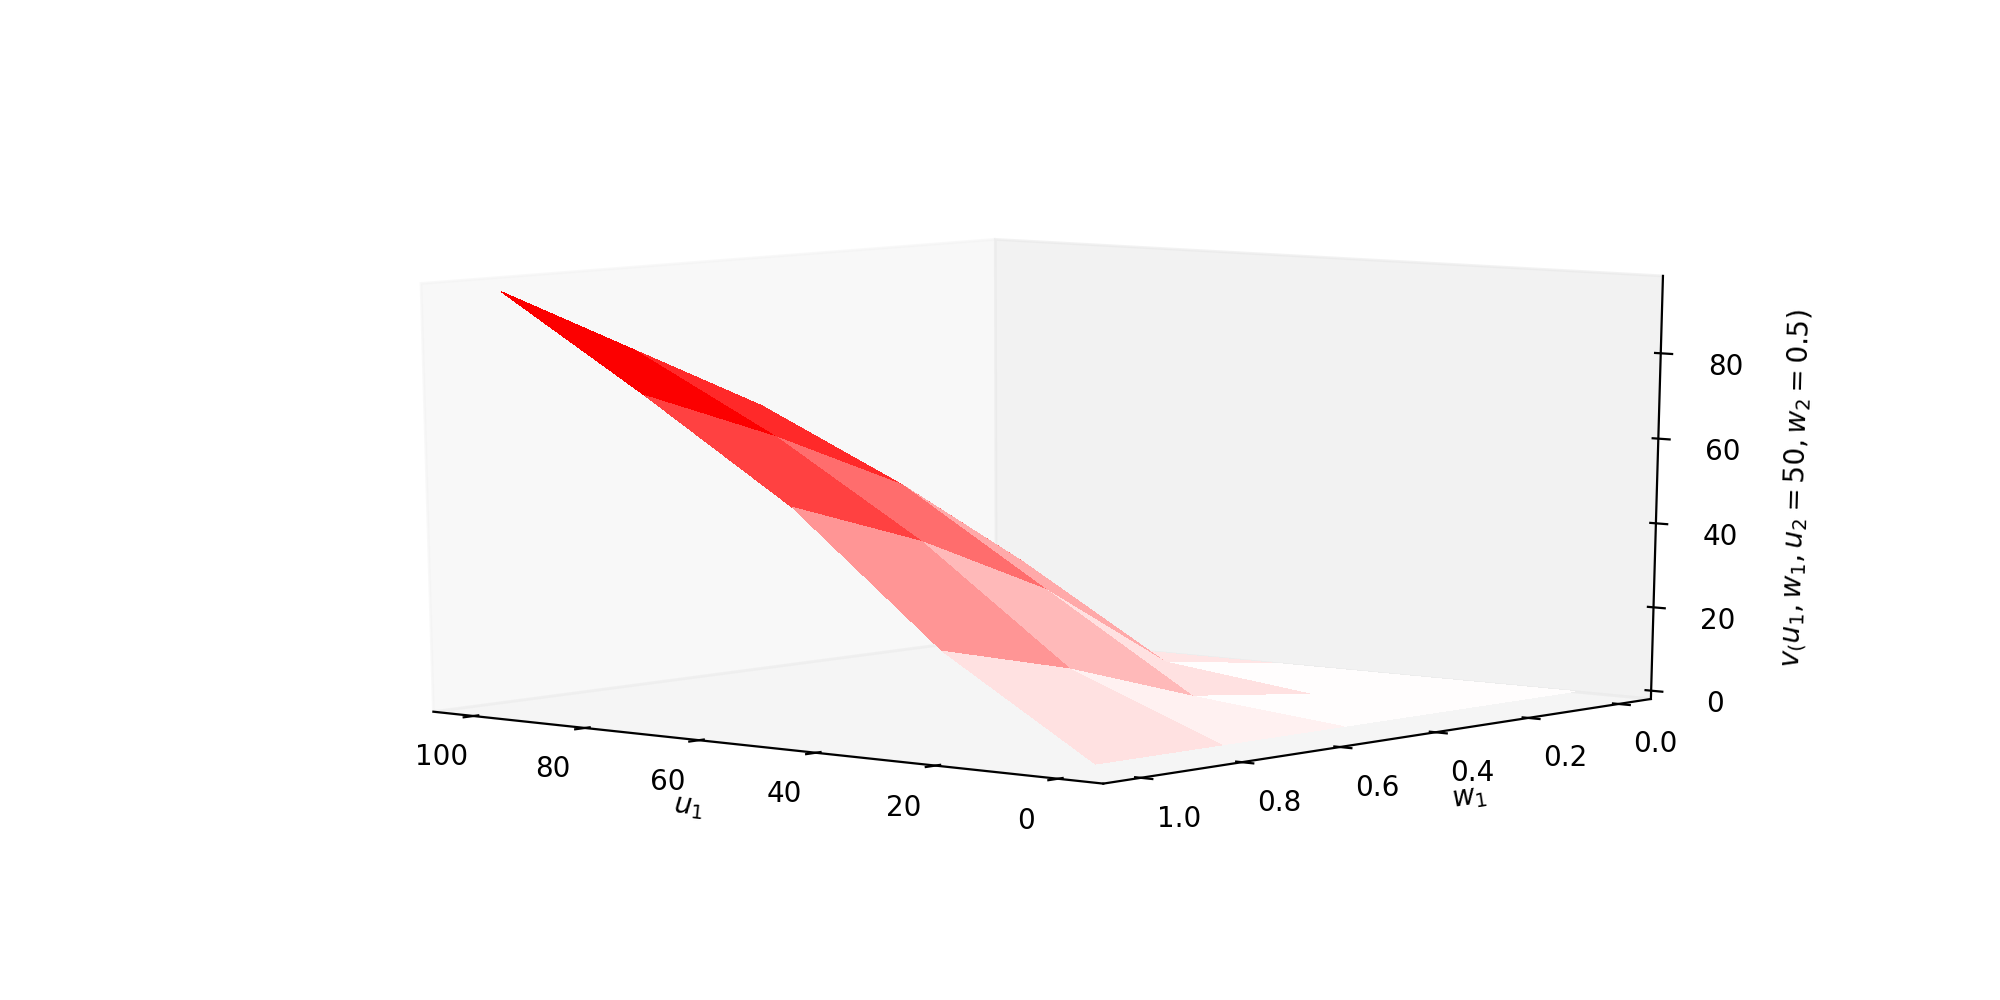

(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x1a22c97cc0>)

In [40]:
cbsp.population_3.plot_3d(u1, w1, u2, w2, at_u2=50, at_w2=0.5, rbp_or_v=v.mean(axis=0), zlabel='v')

### Simple mathematical model prediction
###### Uses weighted linear least squares regression to describe rate-dependent synaptic plasticity in terms of 3 feature models and the 27 feature baseline model

#### 27 feature baseline model

In [41]:
es = cbsp.validation.ExhaustiveSearch(27)
weights = cbsp.utils.get_weights(rbp)
X = cbsp.population_3.feature_matrix(u1, v.mean(axis=0), w1)
es.fit(X, rbp.mean(axis=0), weights)


27 best features:
	1.: ('1', 'u', 'v', 'w', 'u**2', 'u*v', 'u*w', 'v**2', 'v*w', 'w**2', 'u**2*v', 'u**2*w', 'u*v**2', 'u*v*w', 'u*w**2', 'v**2*w', 'v*w**2', 'u**2*v**2', 'u**2*v*w', 'u**2*w**2', 'u*v**2*w', 'u*v*w**2', 'v**2*w**2', 'u**2*v**2*w', 'u**2*v*w**2', 'u*v**2*w**2', 'u**2*v**2*w**2'), 0.938



In [42]:
y_pred = es.predict(X).reshape(len(u1), len(w1), len(u2), len(w2))

<IPython.core.display.Javascript object>


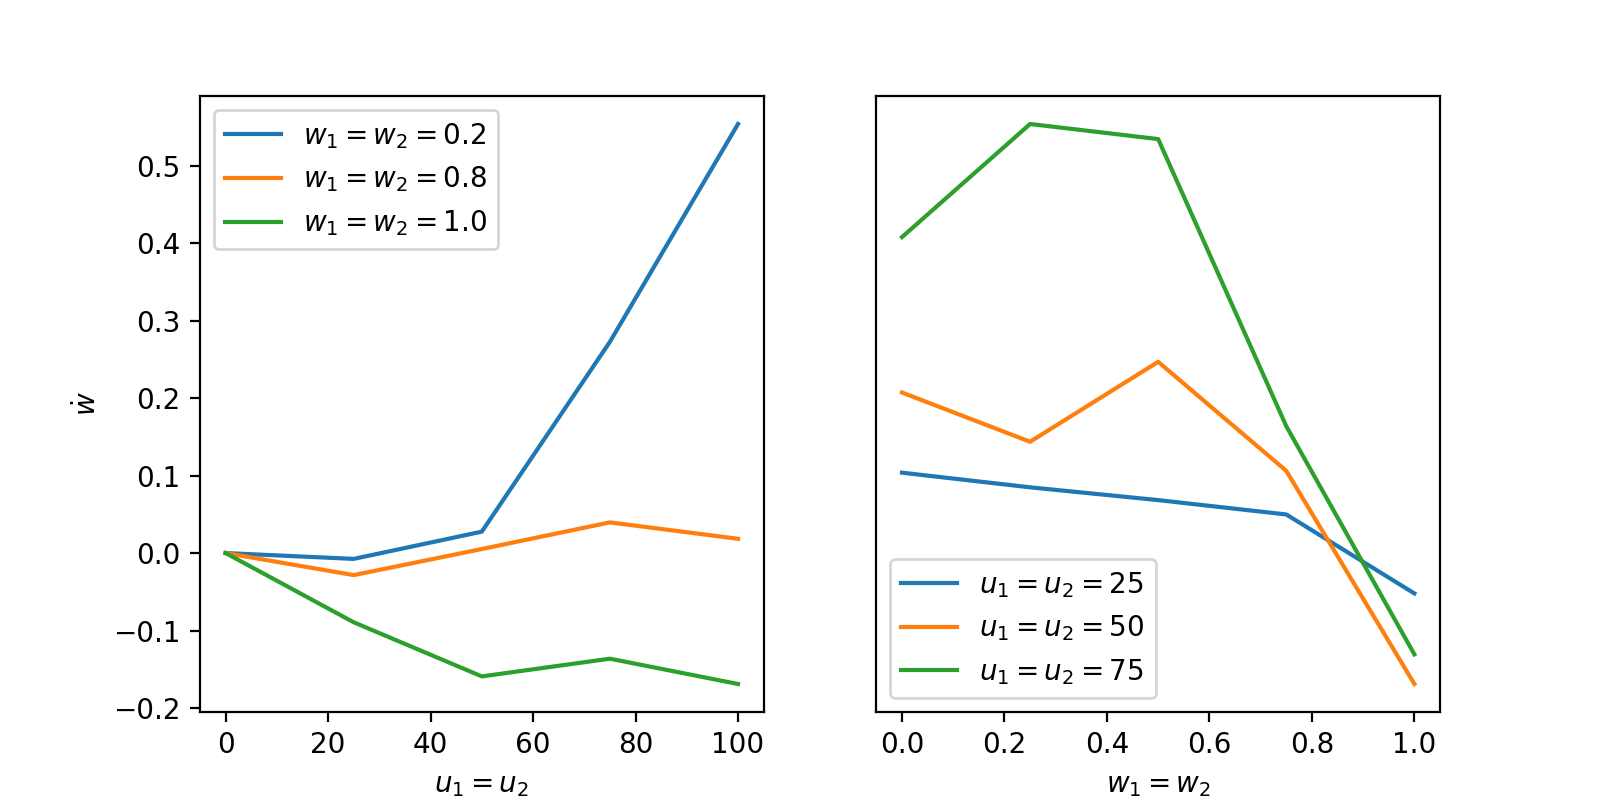

In [43]:
fig = plt.figure(figsize=[8, 4])

ax1 = plt.subplot(121)
ax1.plot(u1, y_pred[np.arange(len(u1)), 1, np.arange(len(u2)), 1], label=f"$w_1=w_2={w1[1]:.1F}$")
ax1.plot(u1, y_pred[np.arange(len(u1)), 3, np.arange(len(u2)), 3], label=f"$w_1=w_2={w1[3]:.1F}$")
ax1.plot(u1, y_pred[np.arange(len(u1)), 4, np.arange(len(u2)), 4], label=f"$w_1=w_2={w1[4]:.1F}$")
ax1.set_ylabel("$\dot{w}$")
ax1.set_xlabel("$u_1=u_2$")
ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(w1, y_pred[1, np.arange(len(w1)), 1, np.arange(len(w2))], label=f"$u_1=u_2={u1[1]:.0F}$")
ax2.plot(w1, y_pred[2, np.arange(len(w1)), 2, np.arange(len(w2))], label=f"$u_1=u_2={u1[2]:.0F}$")
ax2.plot(w1, y_pred[3, np.arange(len(w1)), 3, np.arange(len(w2))], label=f"$u_1=u_2={u1[3]:.0F}$")
ax2.set_yticks([])
ax2.set_xlabel("$w_1=w_2$")
ax2.legend()

#### Best 3 feature model

In [44]:
es = cbsp.validation.ExhaustiveSearch(3)
weights = cbsp.utils.get_weights(rbp)
X = cbsp.population_3.feature_matrix(u1, v.mean(axis=0), w1)
es.fit(X, rbp.mean(axis=0), weights)


3 best features:
	1.: ('u**2', 'u*v', 'u**2*w**2'), 0.602
	2.: ('u', 'u**2', 'u**2*w**2'), 0.601
	3.: ('u', 'u**2', 'u**2*w'), 0.587



In [45]:
y_pred = es.predict(X).reshape(len(u1), len(w1), len(u2), len(w2))

<IPython.core.display.Javascript object>


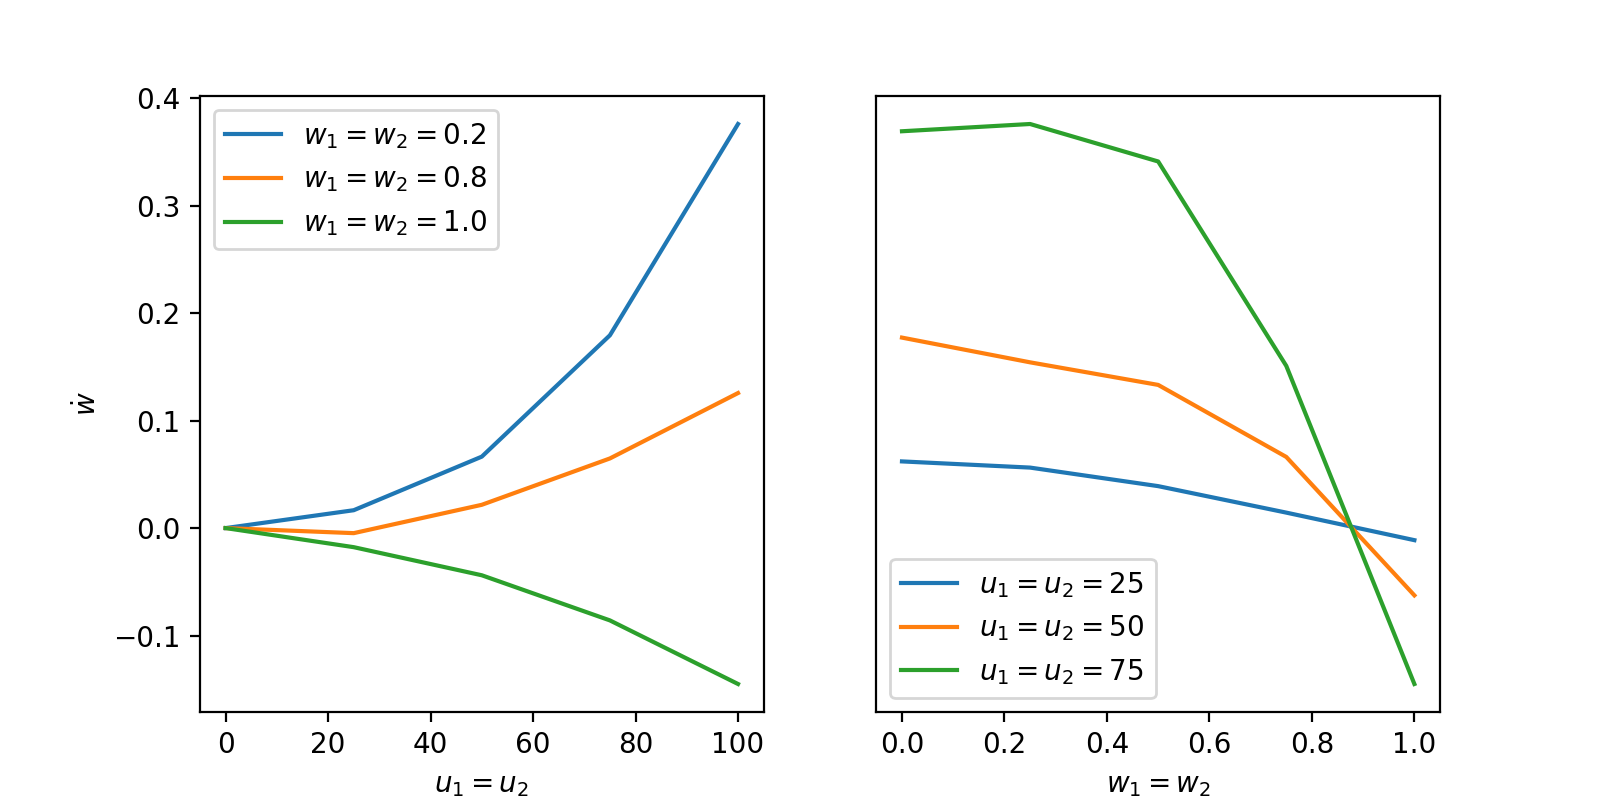

In [46]:
fig = plt.figure(figsize=[8, 4])

ax1 = plt.subplot(121)
ax1.plot(u1, y_pred[np.arange(len(u1)), 1, np.arange(len(u2)), 1], label=f"$w_1=w_2={w1[1]:.1F}$")
ax1.plot(u1, y_pred[np.arange(len(u1)), 3, np.arange(len(u2)), 3], label=f"$w_1=w_2={w1[3]:.1F}$")
ax1.plot(u1, y_pred[np.arange(len(u1)), 4, np.arange(len(u2)), 4], label=f"$w_1=w_2={w1[4]:.1F}$")
ax1.set_ylabel("$\dot{w}$")
ax1.set_xlabel("$u_1=u_2$")
ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(w1, y_pred[1, np.arange(len(w1)), 1, np.arange(len(w2))], label=f"$u_1=u_2={u1[1]:.0F}$")
ax2.plot(w1, y_pred[2, np.arange(len(w1)), 2, np.arange(len(w2))], label=f"$u_1=u_2={u1[2]:.0F}$")
ax2.plot(w1, y_pred[3, np.arange(len(w1)), 3, np.arange(len(w2))], label=f"$u_1=u_2={u1[3]:.0F}$")
ax2.set_yticks([])
ax2.set_xlabel("$w_1=w_2$")
ax2.legend()

### Goodness of predictions over number of features
###### Performs exhaustive search over a range of n-feature models and compares the performance with ablation of u or u^2 features

In [47]:
es = cbsp.validation.ExhaustiveSearch()
weights = cbsp.utils.get_weights(rbp)
X = cbsp.population_3.feature_matrix(u1, v.mean(axis=0), w1)
num_features, best_rs = es.fit_iter(X, rbp.mean(axis=0), weights, min_features=3, max_features=5)


3 best features:
	1.: ('u**2', 'u*v', 'u**2*w**2'), 0.602




4 best features:
	1.: ('u**2', 'u*v', 'u**2*w', 'v**2*w'), 0.744




5 best features:
	1.: ('u**2', 'u*v', 'u**2*w', 'u*v**2', 'v*w**2'), 0.791



In [48]:
X_wo_u = X[[c for c in X.columns if "u" not in c or "u**2" in c]]

In [49]:
_, best_rs_wo_u = es.fit_iter(X_wo_u, rbp.mean(axis=0), weights, max_features=5)


3 best features:
	1.: ('u**2', 'u**2*v', 'u**2*w**2'), 0.585




4 best features:
	1.: ('u**2', 'u**2*v', 'u**2*w', 'u**2*v**2'), 0.704




5 best features:
	1.: ('u**2', 'u**2*v', 'u**2*w', 'u**2*v**2', 'u**2*v*w'), 0.725



In [50]:
X_wo_u2 = X[[c for c in X.columns if "u**2" not in c]]

In [51]:
_, best_rs_wo_u2 = es.fit_iter(X_wo_u2, rbp.mean(axis=0), weights, max_features=5)


3 best features:
	1.: ('u*v', 'u*v*w', 'u*w**2'), 0.536




4 best features:
	1.: ('u', 'u*v', 'u*w', 'u*v*w'), 0.692




5 best features:
	1.: ('u', 'u*v', 'u*w', 'u*v*w', 'u*v*w**2'), 0.716



<IPython.core.display.Javascript object>


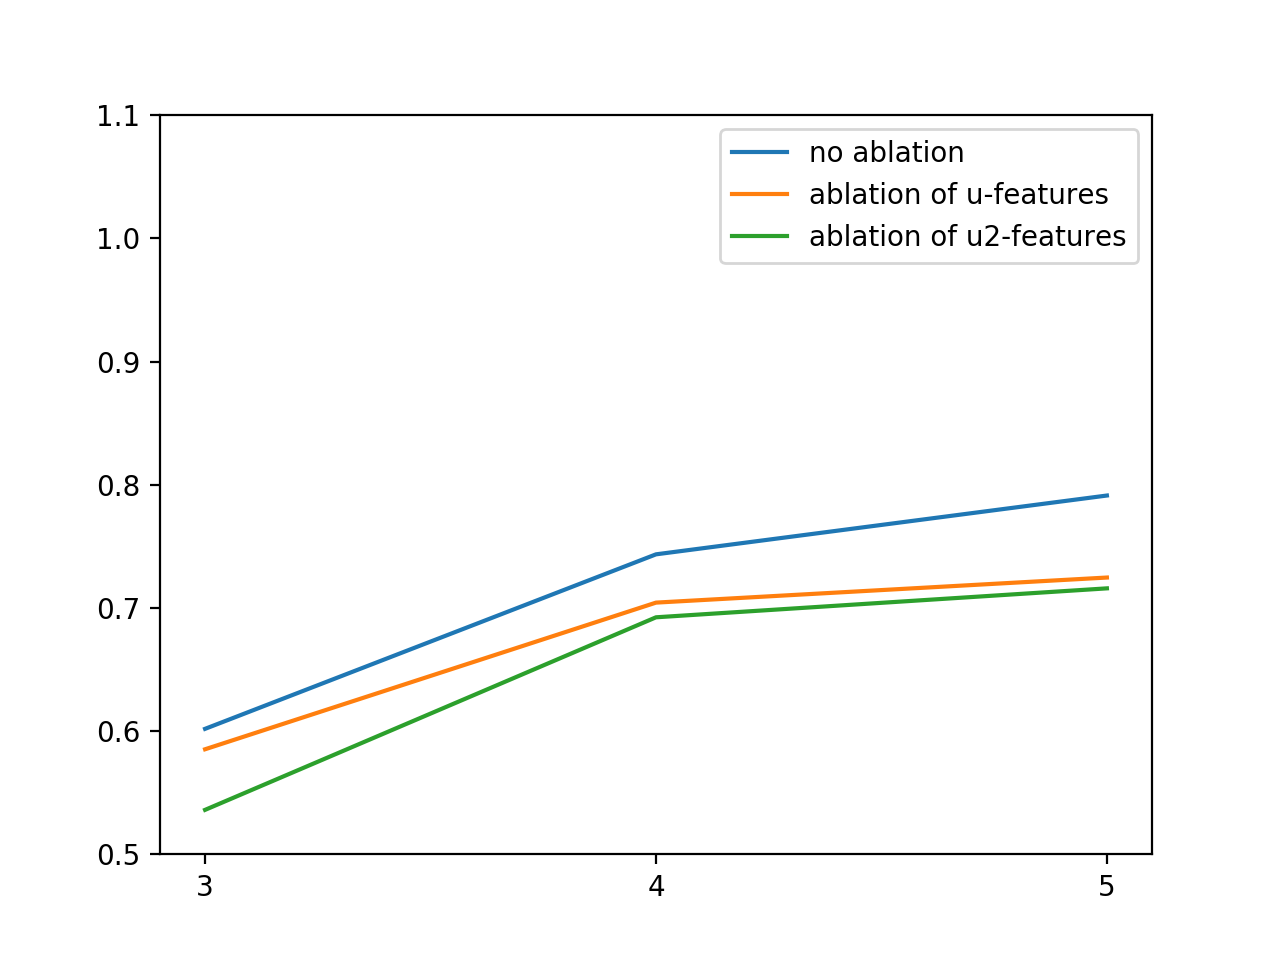

In [52]:
fig = plt.figure()
plt.plot(num_features, best_rs, label="no ablation")
plt.plot(num_features, best_rs_wo_u, label="ablation of u-features")
plt.plot(num_features, best_rs_wo_u2, label="ablation of u2-features")
plt.xticks(num_features)
plt.ylim(0.5, 1.1)
plt.legend()